In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


# Background

Source: https://www.dremeilkamel.com.au/patient-resources/obstetrics/cardiotocography/

Cardiotocography (CTG) is a technical means of recording (-graphy) the fetal heartbeat (cardio-) and the uterine contractions (-toco-) during pregnancy, typically in the third trimester. The machine used to perform the monitoring is called a cardiotocograph, more commonly known as an electronic fetal monitor. CTG can be used to identify signs of fetal distress.

# Data Initialization

In [2]:
data = pd.read_csv("/kaggle/input/fetal-health-classification/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
print(f"{data.shape[0]} rows")
print(f"{data.shape[1]} columns")

2126 rows
22 columns


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# Data Analysis

In [6]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


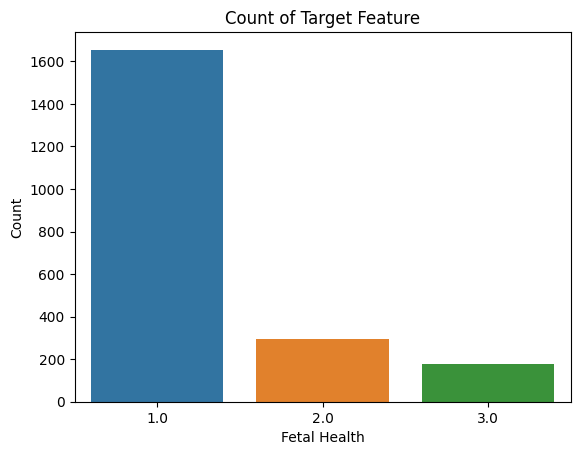

In [7]:
sns.countplot(data=data, x='fetal_health')
plt.title('Count of Target Feature')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()

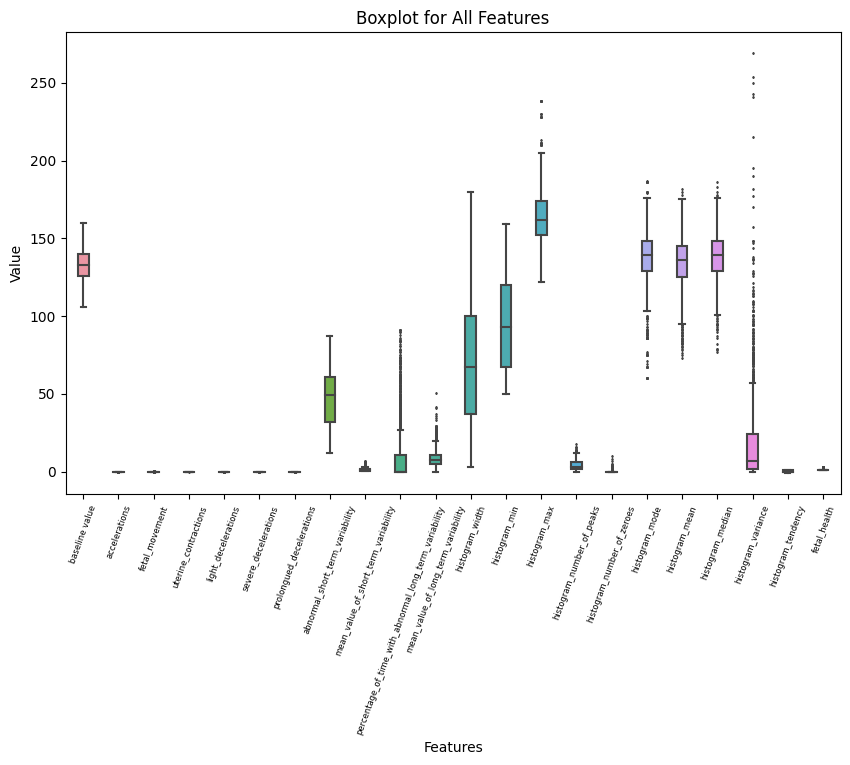

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, width=.3, fliersize=1)
plt.title('Boxplot for All Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=70, fontsize=6)
plt.show()

histogram_variance feature has a lot of outliers, as shown by the boxplot above.

<Axes: xlabel='histogram_variance'>

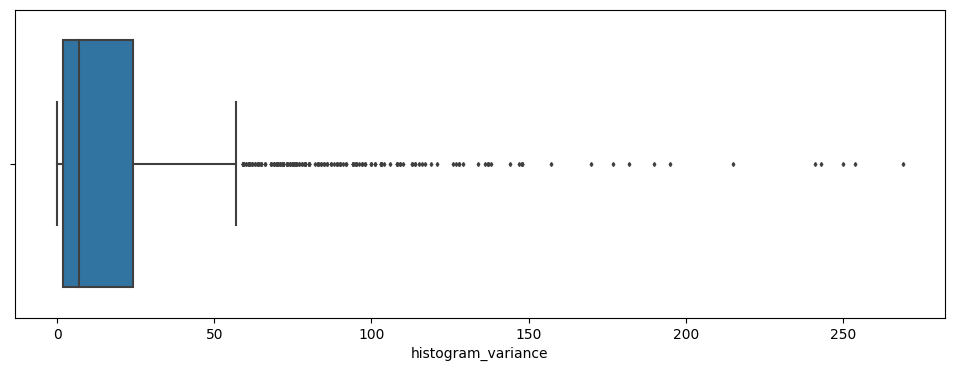

In [9]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='histogram_variance', hue='fetal_health', data=data, fliersize=2)

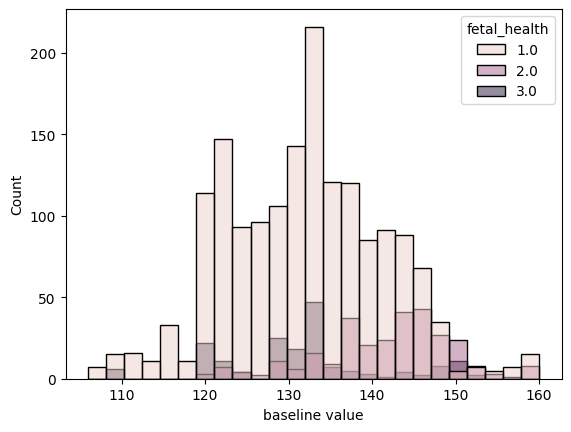

In [10]:
sns.histplot(data=data, x='baseline value', hue='fetal_health')
plt.show()

Fetal health: 
* 1 - Normal 
* 2 - Suspect 
* 3 - Pathological

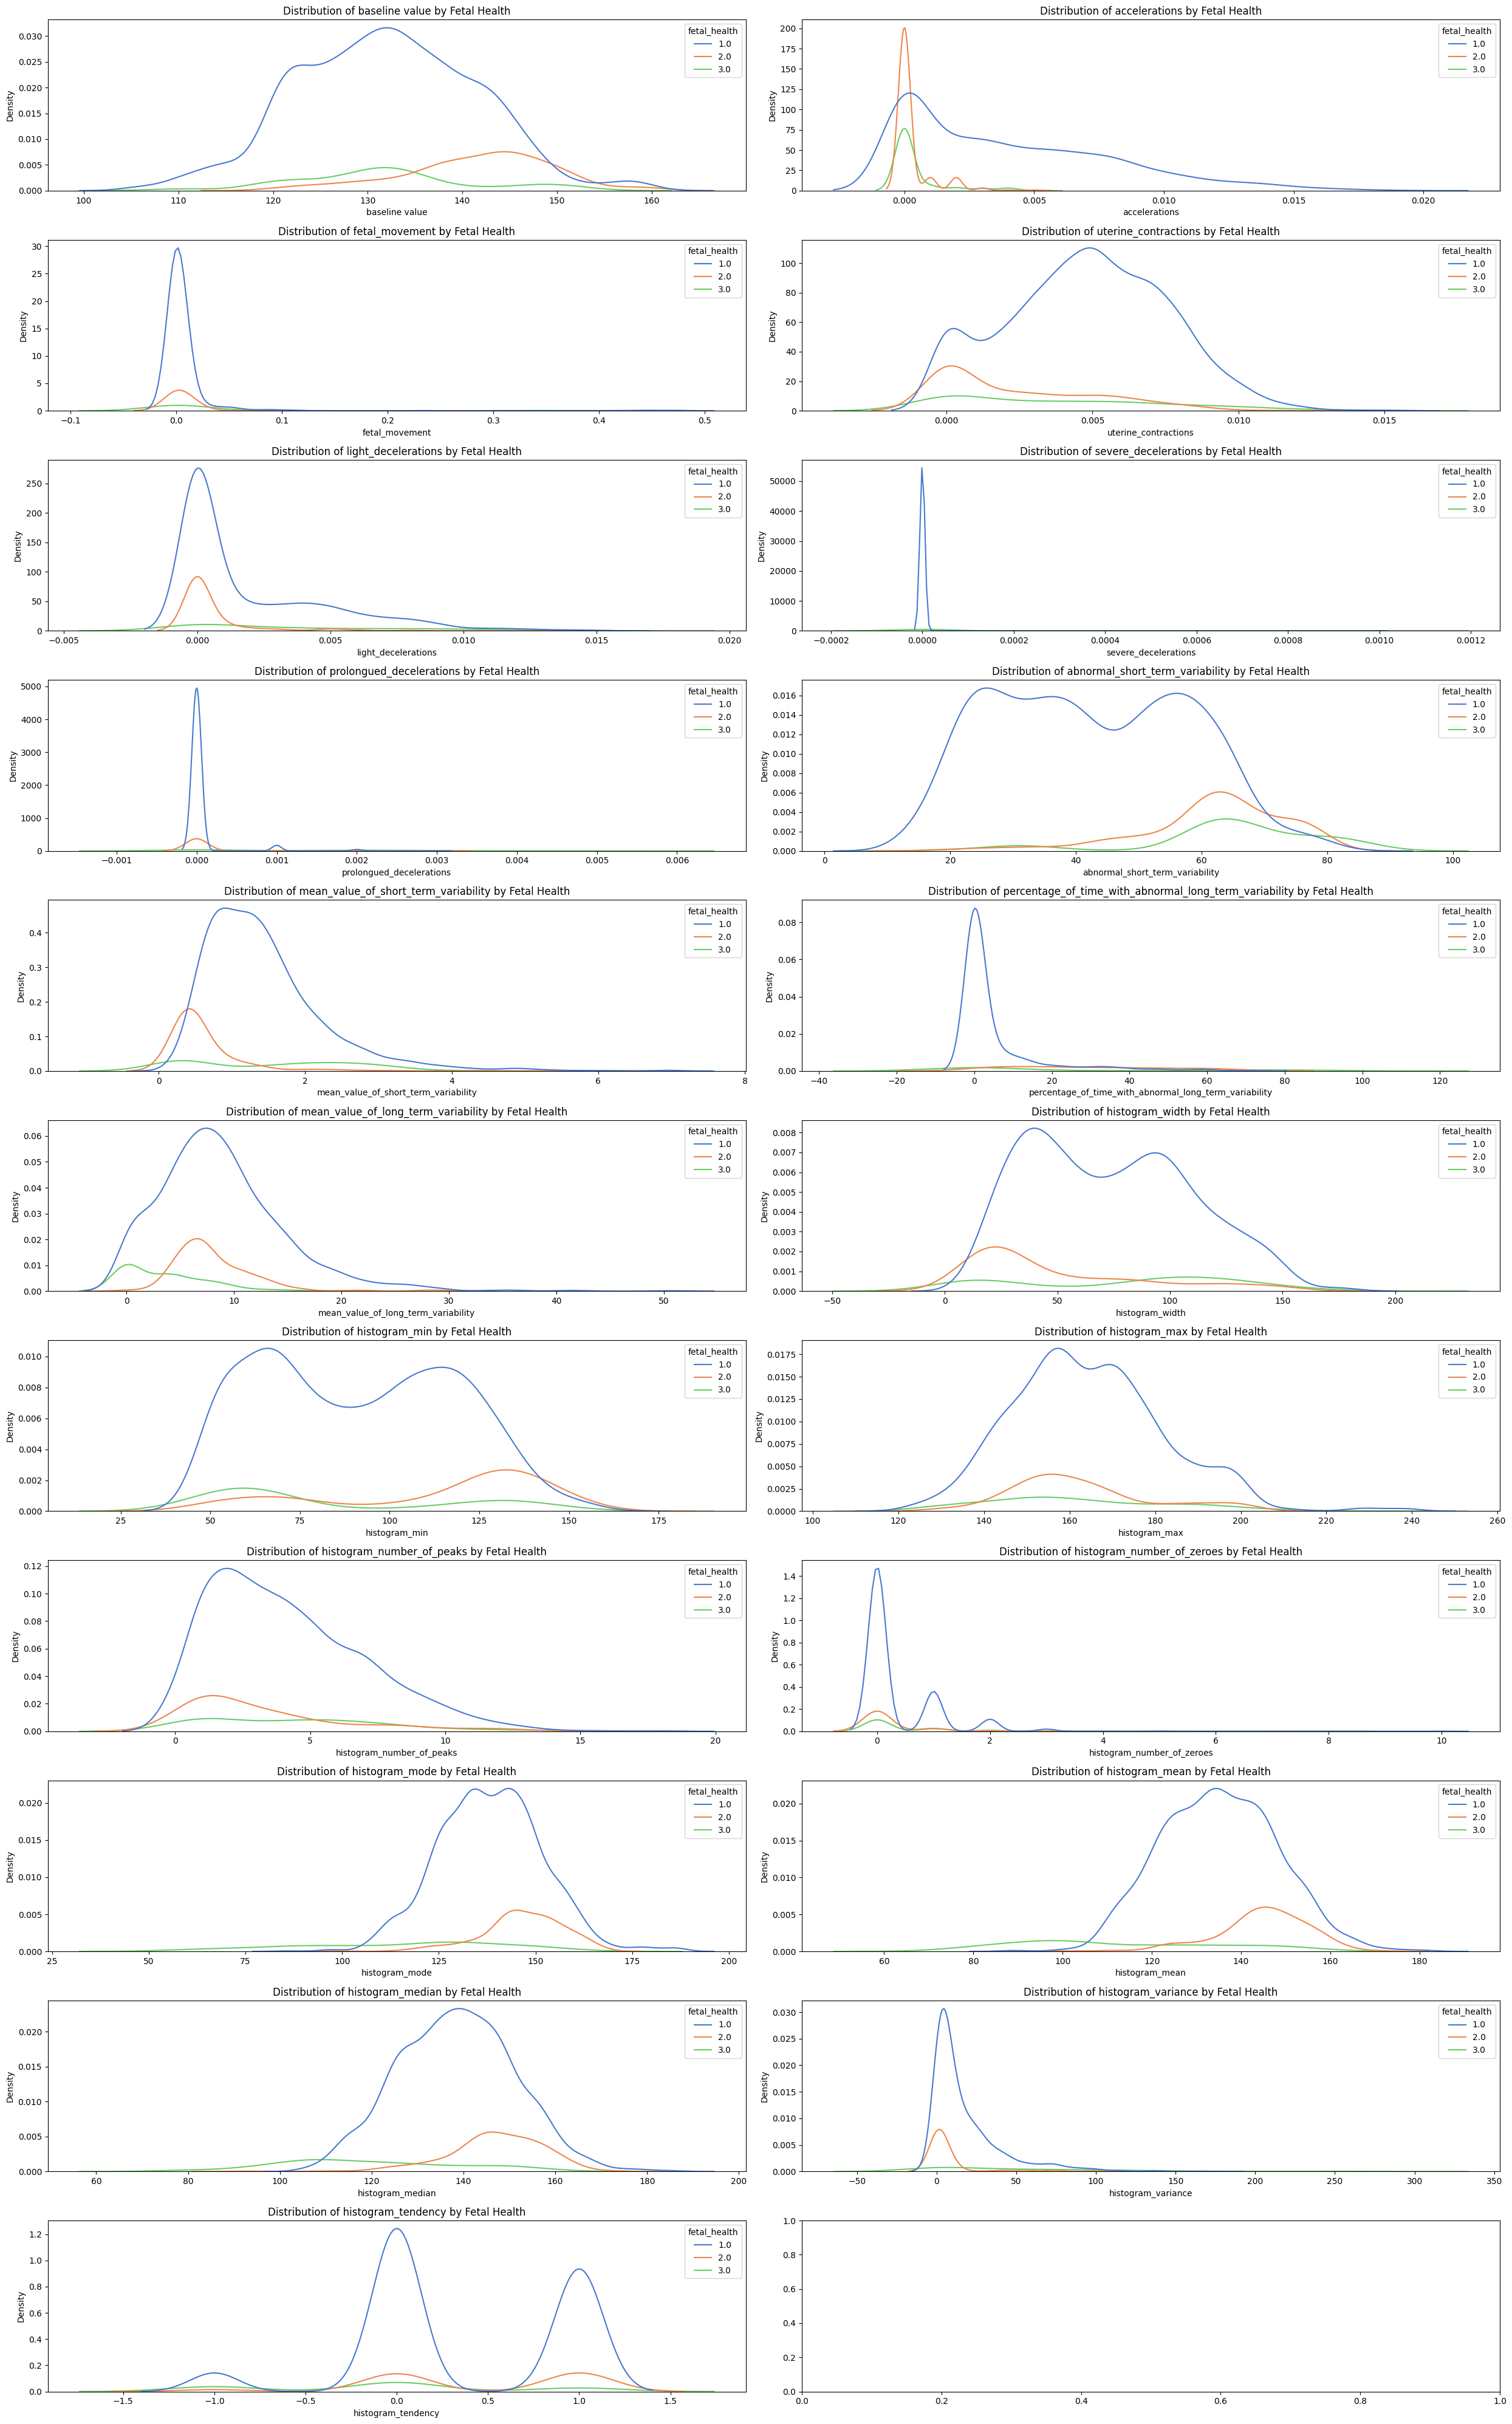

In [11]:
num_cols = 2
num_rows = math.ceil((len(data.columns) - 1) / num_cols)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 40))
axes = axes.flatten()

for i, col in enumerate(data.columns[:-1]):
    sns.kdeplot(data=data, x=col, hue='fetal_health', ax=axes[i], palette='muted')
    axes[i].set_title(f'Distribution of {col} by Fetal Health')

plt.tight_layout()
plt.show()

Based on the kernel density plots, it is hard to separate the target feature based on one feature alone. So, let's compare two features and see if they have any trends or line of separation to distinguish between the target classes. 

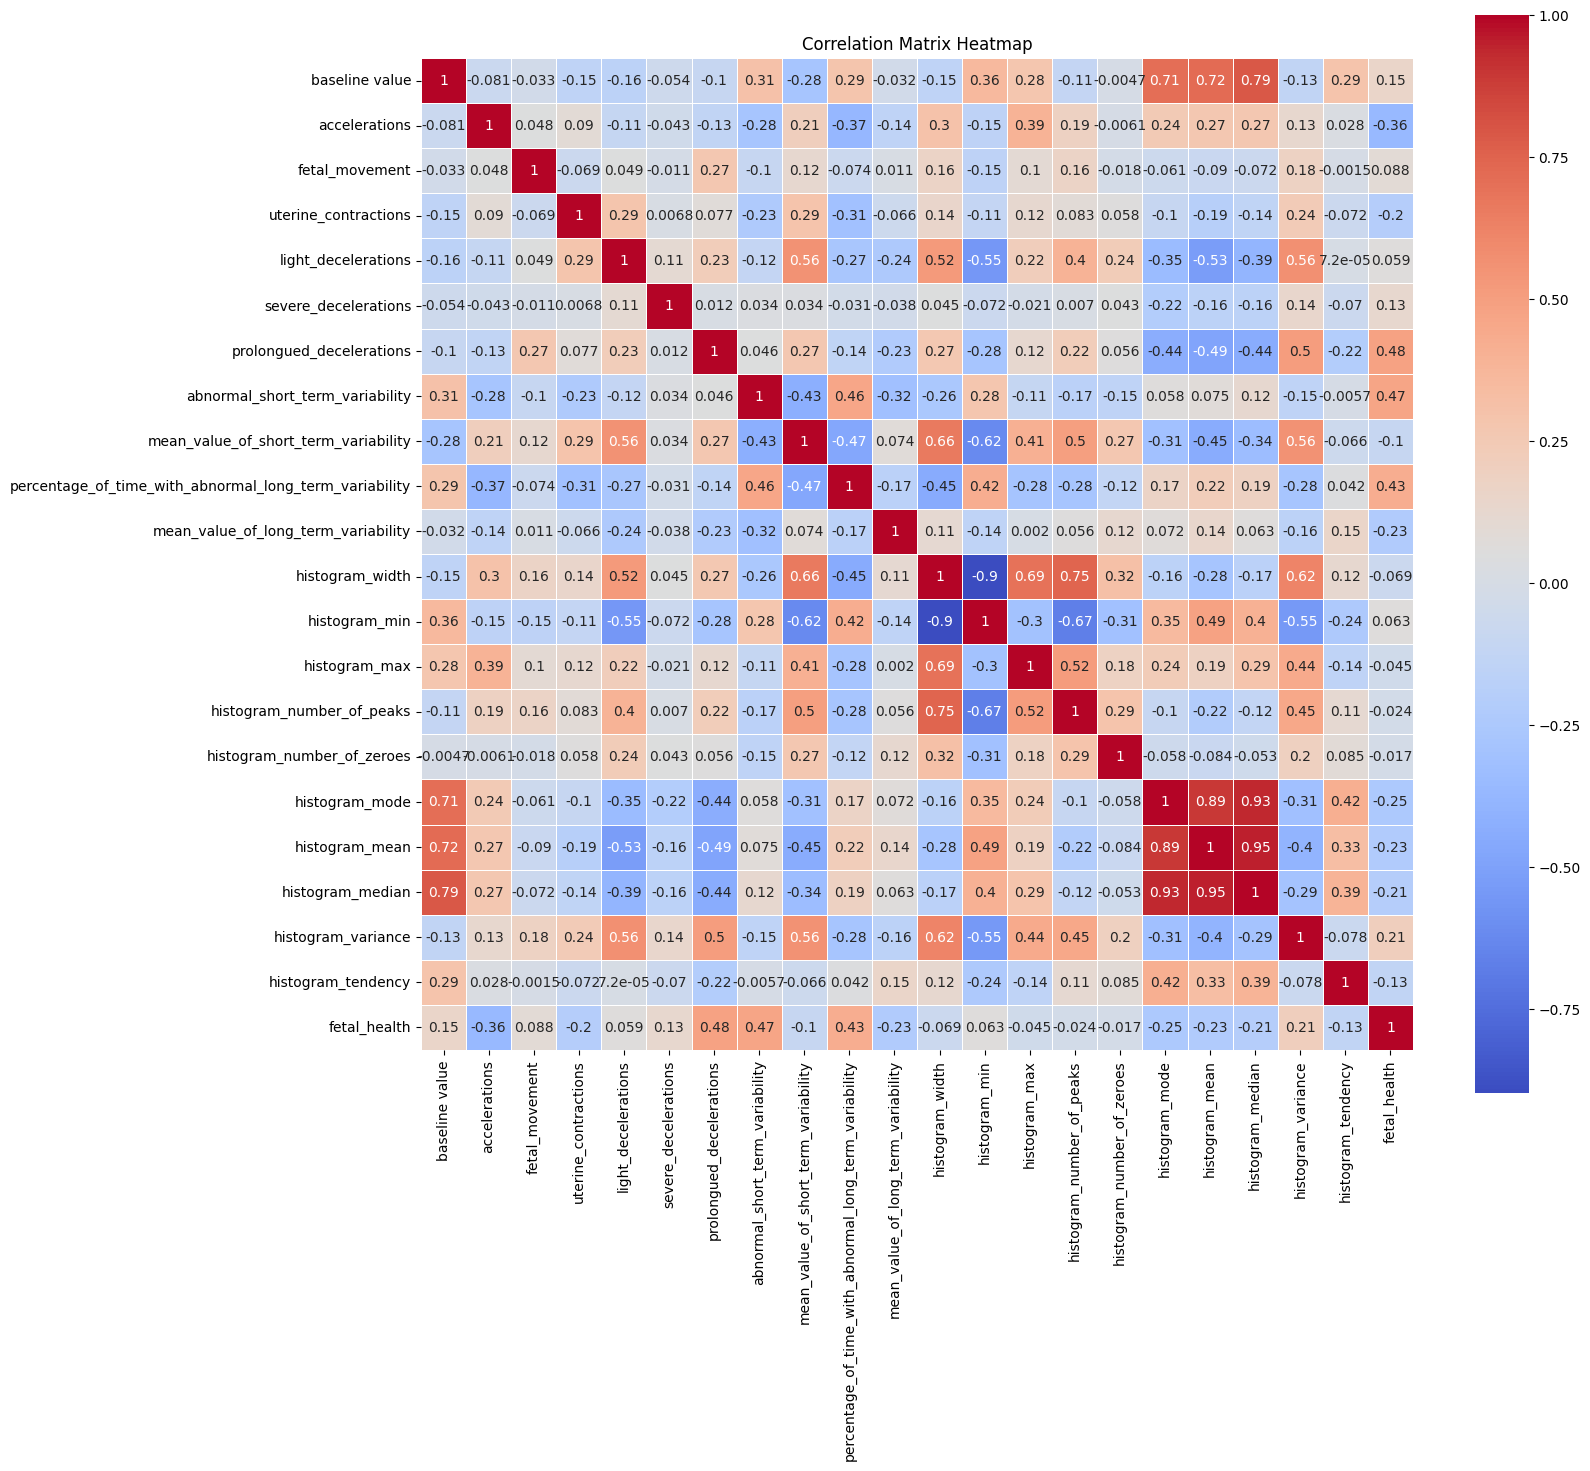

In [12]:
corr = data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Fetal Health feature has 0.48 correlation with prolonged_deceleration, 0.47 correlation with abnormal_short_term_variability, and 0.43 correlation with percentage_of_time_with_abnormal_long_term_variability. Lets explore these using more plots.

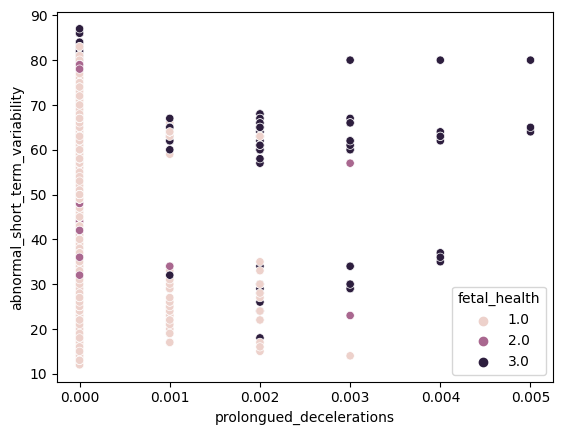

In [13]:
sns.scatterplot(data=data, x='prolongued_decelerations', y='abnormal_short_term_variability', hue='fetal_health')
plt.show()

Higher values of prolongued decelerations show more cased of Pathological fetal health, and with abnormal short term variability, we can observe a bit more separation in the cases and gain a bit more information.

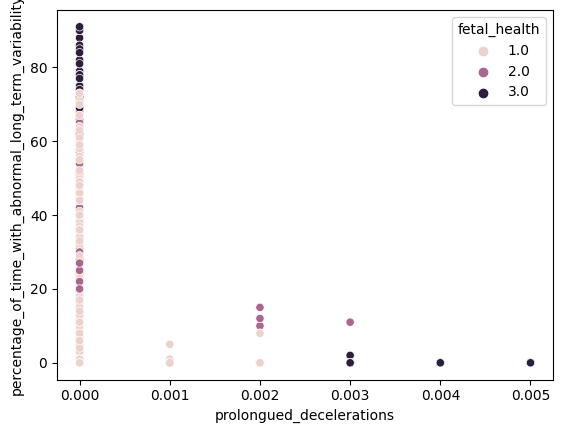

In [14]:
sns.scatterplot(data=data, x='prolongued_decelerations', y='percentage_of_time_with_abnormal_long_term_variability', hue='fetal_health')
plt.show()

Does not provide additional information when combined.

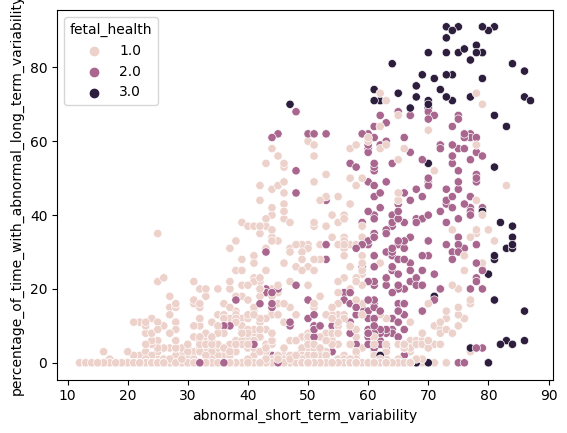

In [15]:
sns.scatterplot(data=data, x='abnormal_short_term_variability', y='percentage_of_time_with_abnormal_long_term_variability', hue='fetal_health')
plt.show()

3 approximate clusters can be discerned from this plot. Useful when considering important features for prediction.

In [16]:
fig = px.scatter_3d(data, 
                    x='prolongued_decelerations', 
                    y='abnormal_short_term_variability', 
                    z='percentage_of_time_with_abnormal_long_term_variability', 
                    color='fetal_health',
                    labels={'target': 'Category'},
                    title='Plot 3 most correlated features')

fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.update_layout(legend=dict(title='Target'))

fig.show()

Most of the values are stuck to one side of the wall because many values in the column 'prolongued decelerations' are 0.

In [17]:
fig = px.scatter_3d(data, 
                    x='accelerations', 
                    y='abnormal_short_term_variability', 
                    z='percentage_of_time_with_abnormal_long_term_variability', 
                    color='fetal_health',
                    labels={'target': 'Category'},
                    title='Plot 3 most correlated features')

fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=4, range=[0, 0.005])
    )
)

fig.update_traces(marker=dict(size=4, opacity=0.8))
fig.update_layout(legend=dict(title='Target'))

fig.show()

Replacing prolongued_decelerations with acceleration, which is the next highest correlated feature (although negatively correlated), produces an interesting result. By the way, the x-axis is zoomed into 0 to 0.005 to take a closer look at how the target values potentially get separated. 

3.0's are separated at the top of the graph, showing that higher abnormal long term variability tends to cause pathological fetal health. Also, higher amount of accelerations, leads to fewer instances of suspect and pathological fetuses, as shown by the spread of 1.0 values in the depth of the image above.

The main goal now is to find a way to distinguish cases where the values of these 3 features are very close together, but still lead to different outcomes in terms of fetal health.